# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [29]:
print(data.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [39]:
feature_vars = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
target_var = "variety"

X = data[feature_vars]
y = data[target_var]

xtr,xts,ytr,yts = train_test_split(X,y,train_size = .75)

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X=xtr,y=ytr)

print(knn.score(X,y))

0.9733333333333334


In [41]:
pred = knn.predict(xts)
print(pred)
print(yts.values)
print(confusion_matrix(pred,yts))

['Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Setosa'
 'Setosa' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Virginica'
 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Setosa'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Virginica']
['Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa' 'Setosa'
 'Setosa' 'Versicolor' 'Setosa' 'Versicolor' 'Virginica' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica' 'Setosa' 'Virginica' 'Virginica'
 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Setosa'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa'
 'Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Virginica']
[[12  0  0]
 [ 0 10  1]
 [ 0  1 14]]


In [42]:
error_rate = []
# Will take some time
for i in range(1,10):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtr,ytr)
    pred_i = knn.predict(xts)
    error_rate.append(np.mean(pred_i != yts))

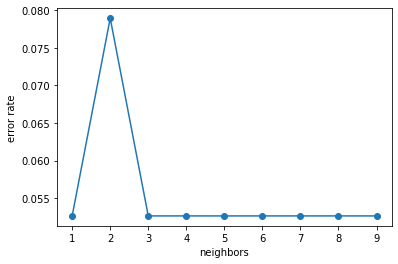

In [43]:
plt.plot(range(1,10),error_rate,marker="o")
plt.ylabel("error rate")
plt.xlabel("neighbors")
plt.show()